In [1]:
# Adding white-noise channels or all-zeros channels to MNIST
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
# Training the same model on MNIST data with noise channels or
# all-zero channels
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = get_model()
hist_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
hist_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.6131 - accuracy: 0.8108 - val_loss: 0.2871 - val_accuracy: 0.9129
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2475 - accuracy: 0.9244 - val_loss: 0.1694 - val_accuracy: 0.9511
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1624 - accuracy: 0.9491 - val_loss: 0.1703 - val_accuracy: 0.9468
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1167 - accuracy: 0.9636 - val_loss: 0.1276 - val_accuracy: 0.9622
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0864 - accuracy: 0.9731 - val_loss: 0.1560 - val_accuracy: 0.9568
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0647 - accuracy: 0.9797 - val_loss: 0.1277 - val_accuracy: 0.9652
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0471 - accuracy: 0.9848 - val_loss: 0.1625 - val_accuracy: 0.9553
Ep

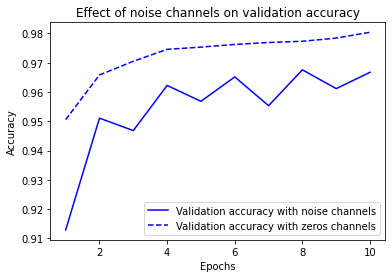

In [4]:
# Plotting a validation accuracy comparison
import matplotlib.pyplot as plt
val_acc_noise = hist_noise.history['val_accuracy']
val_acc_zeros = hist_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-',
    label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--',
    label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [5]:
# Fitting a MNIST model with randomly shuffled labels
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(train_images, random_train_labels,
            epochs=100,
            batch_size=128,
            validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3172 - accuracy: 0.1027 - val_loss: 2.3085 - val_accuracy: 0.1018
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.3002 - accuracy: 0.1133 - val_loss: 2.3125 - val_accuracy: 0.0960
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2914 - accuracy: 0.1254 - val_loss: 2.3161 - val_accuracy: 0.1057
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2764 - accuracy: 0.1386 - val_loss: 2.3235 - val_accuracy: 0.1047
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2596 - accuracy: 0.1545 - val_loss: 2.3330 - val_accuracy: 0.0997
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2375 - accuracy: 0.1688 - val_loss: 2.3499 - val_accuracy: 0.1014
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2137 - accuracy: 0.1841 - val_loss: 2.3646 - val_accuracy: 0.1035

Epoch 58/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9202 - accuracy: 0.6961 - val_loss: 4.6492 - val_accuracy: 0.1037
Epoch 59/100
375/375 [==============================] - 2s 5ms/step - loss: 0.9072 - accuracy: 0.6984 - val_loss: 4.6925 - val_accuracy: 0.1048
Epoch 60/100
375/375 [==============================] - 3s 8ms/step - loss: 0.8914 - accuracy: 0.7043 - val_loss: 4.7742 - val_accuracy: 0.1049
Epoch 61/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8773 - accuracy: 0.7112 - val_loss: 4.8373 - val_accuracy: 0.1039
Epoch 62/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8629 - accuracy: 0.7162 - val_loss: 4.8944 - val_accuracy: 0.1028
Epoch 63/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8470 - accuracy: 0.7210 - val_loss: 4.9754 - val_accuracy: 0.1023
Epoch 64/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8354 - accuracy: 0.7245 - val_loss: 5.0336 - val_accuracy:

In [ ]:
# Hold-out validation
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))

test_score = model.evaluate(test_data)

In [ ]:
# K-fold cross-validation
k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
    validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
data[num_validation_samples * (fold + 1):]
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

In [9]:
# Training a MNIST model with an incorrectly high learning rate
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(train_images, train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 1128.3719 - accuracy: 0.4607 - val_loss: 2.1884 - val_accuracy: 0.2569
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 5.6177 - accuracy: 0.3042 - val_loss: 5.0197 - val_accuracy: 0.2343
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.7706 - accuracy: 0.2987 - val_loss: 3.1980 - val_accuracy: 0.3503
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0970 - accuracy: 0.2976 - val_loss: 2.4074 - val_accuracy: 0.2968
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 3.5071 - accuracy: 0.3163 - val_loss: 2.2332 - val_accuracy: 0.3279
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5053 - accuracy: 0.3140 - val_loss: 2.5787 - val_accuracy: 0.3400
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7744 - accuracy: 0.3076 - val_loss: 16.8670 - val_accuracy: 0.3888
Ep

In [11]:
# The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(train_images, train_labels,
            epochs=10,
            batch_size=128,
            validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.9076 - val_loss: 0.2165 - val_accuracy: 0.9433
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9638 - val_loss: 0.1899 - val_accuracy: 0.9573
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1205 - accuracy: 0.9720 - val_loss: 0.1879 - val_accuracy: 0.9645
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0995 - accuracy: 0.9776 - val_loss: 0.1997 - val_accuracy: 0.9680
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0859 - accuracy: 0.9814 - val_loss: 0.1831 - val_accuracy: 0.9746
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0766 - accuracy: 0.9847 - val_loss: 0.2243 - val_accuracy: 0.9737
Epoch 7/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0744 - accuracy: 0.9856 - val_loss: 0.2270 - val_accuracy: 0.9745
Epoch

In [12]:
# A simple logistic regression on MNIST
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_small_model = model.fit(
        train_images, train_labels,
        epochs=50,
        batch_size=128,
        validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.6586 - accuracy: 0.8384 - val_loss: 0.3602 - val_accuracy: 0.9027
Epoch 2/50
375/375 [==============================] - 0s 966us/step - loss: 0.3507 - accuracy: 0.9040 - val_loss: 0.3078 - val_accuracy: 0.9147
Epoch 3/50
375/375 [==============================] - 0s 976us/step - loss: 0.3158 - accuracy: 0.9120 - val_loss: 0.2905 - val_accuracy: 0.9177
Epoch 4/50
375/375 [==============================] - 0s 975us/step - loss: 0.2995 - accuracy: 0.9168 - val_loss: 0.2824 - val_accuracy: 0.9203
Epoch 5/50
375/375 [==============================] - 0s 957us/step - loss: 0.2900 - accuracy: 0.9190 - val_loss: 0.2755 - val_accuracy: 0.9233
Epoch 6/50
375/375 [==============================] - 0s 962us/step - loss: 0.2836 - accuracy: 0.9214 - val_loss: 0.2730 - val_accuracy: 0.9253
Epoch 7/50
375/375 [==============================] - 0s 961us/step - loss: 0.2785 - accuracy: 0.9218 - val_loss: 0.2702 - val_accuracy: 0

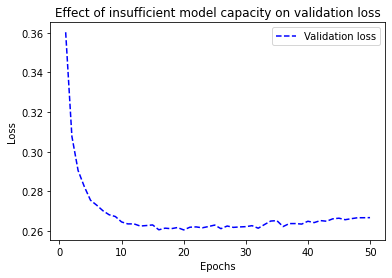

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history['val_loss']
epochs = range(1, 51) # instead of (1, 21), because of raised error
plt.plot(epochs, val_loss, 'b--',
        label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [15]:
# Bigger model with two intermediate layers with 96 units each
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3651 - accuracy: 0.8975 - val_loss: 0.1829 - val_accuracy: 0.9472
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1615 - accuracy: 0.9518 - val_loss: 0.1454 - val_accuracy: 0.9578
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9653 - val_loss: 0.1162 - val_accuracy: 0.9650
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9729 - val_loss: 0.1095 - val_accuracy: 0.9658
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9778 - val_loss: 0.0975 - val_accuracy: 0.9721
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0992 - val_accuracy: 0.9712
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0964 - val_accuracy: 0.9725
Epoch 

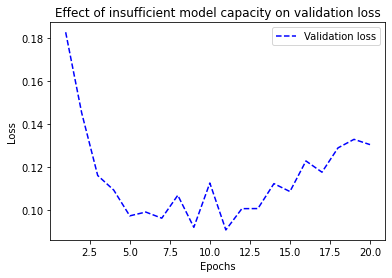

In [18]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history['val_loss']
epochs = range(1, 21) # instead of (1, 21), because of raised error
plt.plot(epochs, val_loss, 'b--',
        label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [17]:
# Original model
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
hist_original = model.fit(train_data, train_labels,
                        epochs=20, batch_size=512, validation_split=0.4)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5218 - accuracy: 0.7861 - val_loss: 0.3932 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3185 - accuracy: 0.8998 - val_loss: 0.3200 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2313 - accuracy: 0.9257 - val_loss: 0.2791 - val_accuracy: 0.8941
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1819 - accuracy: 0.9413 - val_loss: 0.2805 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1477 - accuracy: 0.9526 - val_loss: 0.2846 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1238 - accuracy: 0.9641 - val_loss: 0.2897 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0995 - accuracy: 0.9709 - val_loss: 0.3131 - val_accuracy: 0.8835
Epoch 8/20
30

In [19]:
# Version of the model with lower capacity
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
hist_smaller_model = model.fit(
    train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5835 - accuracy: 0.7780 - val_loss: 0.5077 - val_accuracy: 0.8533
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4357 - accuracy: 0.8837 - val_loss: 0.4127 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3443 - accuracy: 0.9084 - val_loss: 0.3546 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2822 - accuracy: 0.9244 - val_loss: 0.3159 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2372 - accuracy: 0.9351 - val_loss: 0.3020 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2033 - accuracy: 0.9443 - val_loss: 0.2824 - val_accuracy: 0.8919
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1769 - accuracy: 0.9511 - val_loss: 0.2766 - val_accuracy: 0.8916
Epoch 8/20
30

In [ ]:
# Plot Original model vs. smaller model on IMDB review classification

In [20]:
# Version of the model with higher capacity
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
hist_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 3s 81ms/step - loss: 0.5884 - accuracy: 0.7407 - val_loss: 0.3235 - val_accuracy: 0.8839
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2405 - accuracy: 0.9082 - val_loss: 0.3464 - val_accuracy: 0.8584
Epoch 3/20
30/30 [==============================] - 4s 117ms/step - loss: 0.1546 - accuracy: 0.9391 - val_loss: 0.2977 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 4s 124ms/step - loss: 0.0642 - accuracy: 0.9789 - val_loss: 0.3734 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 4s 125ms/step - loss: 0.0785 - accuracy: 0.9787 - val_loss: 0.3910 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 3s 95ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.5269 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 3s 99ms/step - loss: 6.3595e-04 - accuracy: 0.9999 - val_loss: 0.6543 - val_accuracy: 0.8854
Epoch 

In [ ]:
# Plot Original model vs. much larger model on IMDB review classification

In [21]:
# Adding L2 weight regularization to the model
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                kernel_regularizer=regularizers.l2(0.002),
                activation='relu'),
    layers.Dense(16,
                kernel_regularizer=regularizers.l2(0.002),
                activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
hist_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5821 - accuracy: 0.7899 - val_loss: 0.4711 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3839 - accuracy: 0.9006 - val_loss: 0.3830 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3217 - accuracy: 0.9165 - val_loss: 0.3656 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2878 - accuracy: 0.9288 - val_loss: 0.3599 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2659 - accuracy: 0.9346 - val_loss: 0.3791 - val_accuracy: 0.8742
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2515 - accuracy: 0.9411 - val_loss: 0.3563 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2395 - accuracy: 0.9458 - val_loss: 0.3584 - val_accuracy: 0.8860
Epoch 8/20
30

In [ ]:
# Plot Effect of L2 weight regularization on validation loss

In [22]:
# Different weight regularizers available in Keras
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [23]:
# Adding dropout to the IMDB model
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
hist_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6332 - accuracy: 0.6473 - val_loss: 0.5327 - val_accuracy: 0.8173
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5182 - accuracy: 0.7703 - val_loss: 0.4321 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4332 - accuracy: 0.8261 - val_loss: 0.3628 - val_accuracy: 0.8703
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3772 - accuracy: 0.8579 - val_loss: 0.3153 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3267 - accuracy: 0.8848 - val_loss: 0.2941 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2856 - accuracy: 0.9019 - val_loss: 0.2813 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2582 - accuracy: 0.9123 - val_loss: 0.2807 - val_accuracy: 0.8894
Epoch 8/20
30

In [ ]:
# Plot Effect of dropout on validation loss